# Ex 0. Getting Started: Poisson neurons

> In this project, we will be using **Poisson neurons** to simulate the neural activity. Their simplicity makes them a great candidate for efficiently simulating large scale population dynamics at the cost of some biological inaccuracies. Poisson neurons, as well as rate models in general, are described in more detail in the *Neuronal Dynamics* book in sections 7.2 and 15.3 respectively.
> 
> We use the following model for simulating the neurons. The potential $h_i$ (in mV) of every neuron $i$ evolves according to the differential equation
> 
> $$ \tau \frac{dh_i}{dt}(t) = -h_i(t) + RI_i(t) $$
> 
> where in the remaining we will take $ R = 1M\Omega$. Every neuron has an instantaneous mean firing rate $ r_i(t) $ given by the transfer function $ g $, for which we will use the sigmoid function
> 
> $$ r_i(t) = r_0g(h_i(t)) = \frac{r_0}{1 + e^{-2\alpha(h_i(t)-\beta)}} $$
> 
> where $ \alpha $ and $ \beta $ are parameters for tuning the shape of the transfer function, and $ r_0 = 1 \text{ms}^{-1} $.
> 
> In this model the spikes are generated according to a Poisson process, where the probability of having one spike in an interval $[t,t + \Delta t)$ is
> 
> $$ P \{ \text{spike in} [t,t + \Delta t) \} = r(t) \cdot \Delta t $$
> 
> **Network parameters.** Unless mentioned otherwise, we will be using the parameters $ \alpha = 2 \text{mV}^{-1} $, $ \beta = 0.5 \text{mV} $, $ \Delta t = 0.1 \text{ms} $, $ \tau = 10 \text{ms} $.
> 
> We start by examining the input-output relationship of the Poisson neurons.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
R = 1e6  # Resistance in ohms
r0 = 1 # ms^-1

# Network parameters
alpha = 2 # mV^-1
beta = 0.5 # mV
dt = 0.1 # ms
tau = 10 # ms

## 0.1.
> Plot the transfer function g as a function of the potential h. How do α and β affect the shape?

In [3]:
# Define the transfer function
def g(h):
    return 1 / (1 + np.exp(-2 * alpha * (h - beta)))

In [4]:
# Generate a range of potential values
h_values = np.linspace(-5, 5, 300)  # Adjust the range as needed

# Calculate the firing rates
r_values = g(h_values)

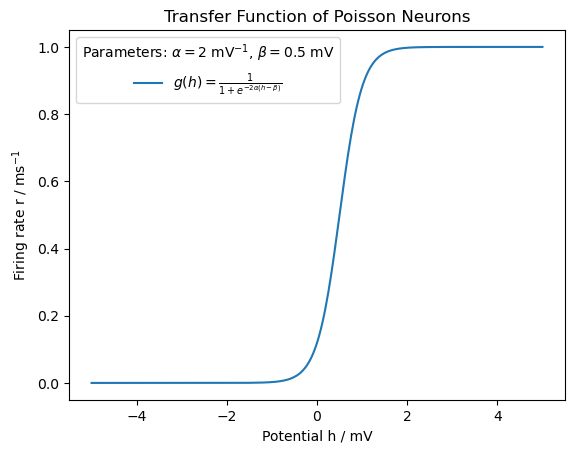

In [5]:
# Plot the transfer function
plt.plot(h_values, r_values, label=r'$g(h) = \frac{1}{1 + e^{-2\alpha(h - \beta)}}$')

# Add labels and title
plt.xlabel('Potential h / mV')
plt.ylabel(r'Firing rate r / ms$^{{-1}}$')
plt.title('Transfer Function of Poisson Neurons')

# Add the legend
plt.legend(title=r'Parameters: $\alpha={}$ mV$^{{-1}}$, $\beta={}$ mV'.format(alpha, beta))

# Save the plot
plt.savefig('figures/0.1.transfer_function.png')

# Display the plot
plt.show()

$\alpha$ determines the steepness of the curve. A higher value of $\alpha$ makes the transition from the low firing rate to the high firing rate more abrupt.

$\beta$ sets the threshold potential at which the firing rate increases significantly. If $h_i(t)$ is much less than $\beta$, the firing rate $r_i(t)$ will be close to 0. If $h_i(t)$ is much greater than $\beta$, the firing rate will approach $r_0$ (here 1).

## 0.2.
> Simulate the dynamics of $ N = 100 $ unconnected neurons for $ T = 1000 $ ms, receiving the slowly oscillating input $ I_i(t) = I_0 \sin(\omega t) $ with $ I_0 = 2 $ nA, $ \omega = 10 $ rad/s, and with all neurons initialised at $ h_i(t = 0) = 0 $ mV.
> 
> - Compare the mean number of spikes per ms across the $ N $ neurons to the instantaneous rate $ r = r_0g(RI(t)) $. Explain the difference that you see.
> - Now simulate $ N = 1000 $ neurons. Compare again as before, and explain the difference you see.
> 
> **Hints:**
> - Write a method that runs the evolution of the membrane potentials, according to Eqs. (1) and (2). It should take as an argument the initial voltages $ h_i(t = 0) $, and return all the voltages and spikes of the neurons through time.
> - Eq. (1) can be integrated directly using the forward Euler method, with discrete time steps $ t = t_0, t_1, ... (t_k = k \cdot \Delta t) $. It gives the following update rule:
> $$h_i(t_{k+1}) = h_i(t_k) + \Delta t \cdot \frac{dh_i}{dt}(t_k)$$
> - Combine spikes into bins of size 1ms, and scale accordingly to obtain an average firing rate.


In [6]:
N = 1000  # Number of neurons
T = 1000  # Total time in ms

I0 = 2e-9  # Input current amplitude in A
omega = 10  # Frequency in rad/s

In [7]:
# Time vector
time = np.arange(0, T, dt)

# Initialize variables
h = np.zeros((N, len(time)))  # Potential in mV, for each neuron and time step
spike_counts = np.zeros((N, len(time)))  # Spike count for each neuron

In [8]:
# Simulation loop
for s, t in enumerate(time):
    I = I0 * np.sin(omega * t)  # Input current
    dh = (-h[:, s-1] + R * I) / tau * dt  # Change in potential
    h[:, s] = h[:, s-1] + dh  # Update potential
    
    r = r0 * g(h[:, s])  # Firing rate
    p_spike = r * dt  # Probability of spike
    spikes = np.random.rand(N) < p_spike  # Determine spikes
    # spikes = np.random.poisson(r * dt)  # Determine spikes
    spike_counts[:, s] = spikes  # Update spike counts

# Results
mean_spikes_per_ms = np.mean((np.mean(spike_counts, axis=1))) / dt
instantaneous_rate = r0 * g(R * I0 * np.sin(omega * time))

# Compare mean number of spikes to instantaneous rate
print(f"Mean number of spikes per ms across the N={N} neurons: {mean_spikes_per_ms}")
print(f"Instantaneous rate r: {np.mean(instantaneous_rate)}")
print(f'Difference: {mean_spikes_per_ms - np.mean(instantaneous_rate)} ms^-1')
print(f'Percentage difference: {100 * abs(mean_spikes_per_ms - np.mean(instantaneous_rate)) / np.mean(instantaneous_rate)}%')

Mean number of spikes per ms across the N=1000 neurons: 0.119527
Instantaneous rate r: 0.11920436429389575
Difference: 0.0003226357061042462 ms^-1
Percentage difference: 0.27065762903512064%


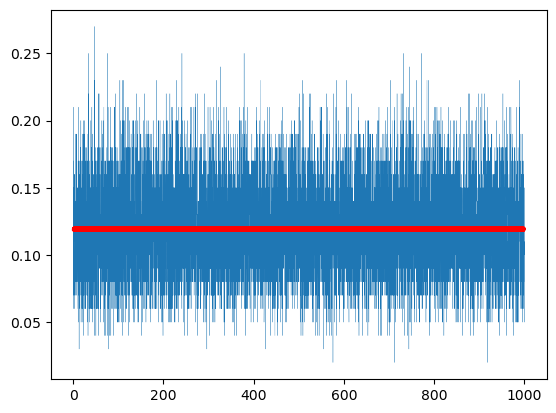

In [9]:
plt.plot(time, np.mean(spike_counts, axis=0)/dt,  lw=.2, label='Spike count')
plt.plot(time, instantaneous_rate, c='r', lw=2)

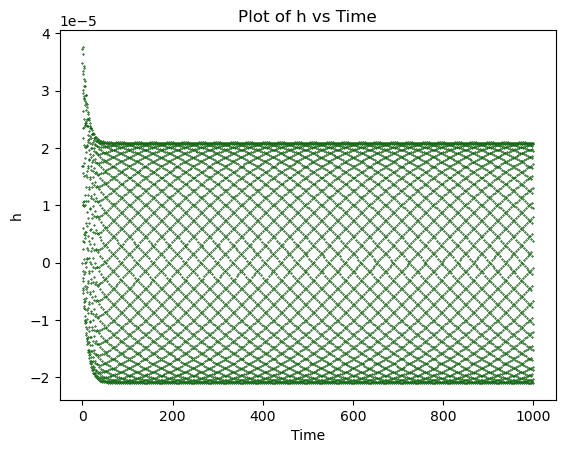

In [10]:
import matplotlib.pyplot as plt

plt.scatter(time, h[0], s=0.1, c='black', label='Neuron 0')
plt.scatter(time, h[1], s=0.1, c='green', label='Neuron 1')
plt.xlabel('Time')
plt.ylabel('h')
plt.title('Plot of h vs Time')
plt.show()